In [1]:
# High Value Customer Identification and Segmentation

# Dataset: Online Retail II

# Metode: Supervised & Unsupervised Learning

# ## Tahapan Analisis:
# 1. **Preprocessing Data Transaksi** - Membersihkan dan menyiapkan data transaksi
# 2. **Customer Aggregation** - Agregasi data transaksi ke level customer
# 3. **Preprocessing Data Customer** - Mempersiapkan data customer untuk modeling
# 4. **Analisis Distribusi Target Variable** - Analisis keseimbangan dataset HVC
# 5. **Classification Modeling** - Supervised Learning untuk prediksi High Value Customer
# 6. **Customer Segmentation** - Unsupervised Learning menggunakan K-Means Clustering

## 1. Preprocessing

Preprocessing data dilakukan untuk :
- Handle missing values
- Menghapus duplikat & negative values (untuk melihat High Valuable Customer attribut yang memiliki negative values dihilangkan karena akan menyulitkan training model)
- Konversi tipe data
- Feature engineering (TotalAmount, fitur waktu)

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries berhasil di-import")

✓ Libraries berhasil di-import


In [3]:
# Load Data
df = pd.read_csv('Raw/online_retail_II.csv')

print("="*60)
print("DATA BERHASIL DIMUAT")
print("="*60)
print(f"Jumlah baris: {df.shape[0]:,}")
print(f"Jumlah kolom: {df.shape[1]}")
print(f"\nKolom-kolom dalam dataset:")
print(df.columns.tolist())
print(f"\n5 Baris Pertama:")
df.head()

DATA BERHASIL DIMUAT
Jumlah baris: 525,461
Jumlah kolom: 8

Kolom-kolom dalam dataset:
['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']

5 Baris Pertama:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
# Informasi Dataset
print("="*60)
print("INFORMASI DATASET")
print("="*60)
print(f"\nTipe Data:")
print(df.dtypes)
print(f"\nMissing Values:")
print(df.isnull().sum())
print(f"\nStatistik Deskriptif:")
df.describe()

INFORMASI DATASET

Tipe Data:
Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

Missing Values:
Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

Statistik Deskriptif:


,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


### 1.1 Handle Missing Values

In [5]:
# Handle Missing Values
print("="*60)
print("HANDLE MISSING VALUES")
print("="*60)

# Hapus baris dengan missing di kolom krusial
initial_rows = len(df)
df = df.dropna(subset=['Invoice', 'StockCode', 'Customer ID'])
removed = initial_rows - len(df)
print(f"\n✓ Dihapus {removed:,} baris dengan missing Invoice/StockCode/Customer ID")

# Isi missing Description dan Country
df['Description'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
print(f"✓ Missing Description & Country diisi dengan 'Unknown'")

print(f"\nJumlah baris sekarang: {len(df):,}")
print(f"Missing values setelah handling:")
print(df.isnull().sum())

HANDLE MISSING VALUES

✓ Dihapus 107,927 baris dengan missing Invoice/StockCode/Customer ID
✓ Missing Description & Country diisi dengan 'Unknown'

Jumlah baris sekarang: 417,534
Missing values setelah handling:
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


### 1.2 Remove Duplicates & Handle Negative Values

In [6]:
# Remove Duplicates
print("="*60)
print("REMOVE DUPLICATES")
print("="*60)

initial_rows = len(df)
df = df.drop_duplicates()
duplicates_removed = initial_rows - len(df)
print(f"✓ Dihapus {duplicates_removed:,} baris duplikat")

# Handle Negative Values (cancellation/return)
print("\n" + "="*60)
print("HANDLE NEGATIVE VALUES")
print("="*60)

negative_quantity = (df['Quantity'] < 0).sum()
print(f"Transaksi dengan Quantity negatif: {negative_quantity:,}")

initial_rows = len(df)
df = df[df['Quantity'] > 0]
removed = initial_rows - len(df)
print(f"✓ Dihapus {removed:,} baris dengan Quantity negatif")

print(f"\nJumlah baris sekarang: {len(df):,}")

REMOVE DUPLICATES
✓ Dihapus 6,771 baris duplikat

HANDLE NEGATIVE VALUES
Transaksi dengan Quantity negatif: 9,816
✓ Dihapus 9,816 baris dengan Quantity negatif

Jumlah baris sekarang: 400,947


### 1.3 Data Type Conversion & Feature Engineering

In [7]:
# Data Type Conversion
print("="*60)
print("DATA TYPE CONVERSION")
print("="*60)

# Konversi InvoiceDate ke datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce').astype('int64')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').astype('float64')
df['Customer ID'] = df['Customer ID'].astype(str)

print("✓ InvoiceDate -> datetime")
print("✓ Quantity -> int64")
print("✓ Price -> float64")
print("✓ Customer ID -> object")

# Feature Engineering
print("\n" + "="*60)
print("FEATURE ENGINEERING")
print("="*60)

# TotalAmount
df['TotalAmount'] = df['Quantity'] * df['Price']
print("✓ TotalAmount = Quantity × Price")

# Time Features
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6])

print("✓ Fitur waktu: Year, Month, Day, Hour, DayOfWeek, IsWeekend")

print(f"\nJumlah kolom sekarang: {df.shape[1]}")
print(f"Kolom baru: {['TotalAmount', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'IsWeekend']}")

DATA TYPE CONVERSION
✓ InvoiceDate -> datetime
✓ Quantity -> int64
✓ Price -> float64
✓ Customer ID -> object

FEATURE ENGINEERING
✓ TotalAmount = Quantity × Price
✓ Fitur waktu: Year, Month, Day, Hour, DayOfWeek, IsWeekend

Jumlah kolom sekarang: 15
Kolom baru: ['TotalAmount', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'IsWeekend']


In [8]:
# Save Preprocessed Data
output_path = 'Raw/online_retail_II_preprocessed.csv'
df.to_csv(output_path, index=False)

print("="*60)
print("PREPROCESSING SELESAI")
print("="*60)
print(f"✓ Data berhasil disimpan: {output_path}")
print(f"✓ Total baris: {len(df):,}")
print(f"✓ Total kolom: {df.shape[1]}")
print(f"✓ Periode: {df['InvoiceDate'].min()} s/d {df['InvoiceDate'].max()}")

df.head()

PREPROCESSING SELESAI
✓ Data berhasil disimpan: Raw/online_retail_II_preprocessed.csv
✓ Total baris: 400,947
✓ Total kolom: 15
✓ Periode: 2009-12-01 07:45:00 s/d 2010-12-09 20:01:00


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalAmount,Year,Month,Day,Hour,DayOfWeek,IsWeekend
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,12,1,7,1,False
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,7,1,False
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,7,1,False
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009,12,1,7,1,False
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009,12,1,7,1,False


---

## Part 2: Customer Aggregation

Mengagregasi data transaksi ke level pelanggan untuk membuat fitur RFM (Recency, Frequency, Monetary).

In [9]:
# Load Preprocessed Data
df_trans = pd.read_csv('Raw/online_retail_II_preprocessed.csv')
df_trans['InvoiceDate'] = pd.to_datetime(df_trans['InvoiceDate'])

print("="*60)
print("DATA PREPROCESSED DIMUAT")
print("="*60)
print(f"Total transaksi: {len(df_trans):,}")
print(f"Customer unik: {df_trans['Customer ID'].nunique():,}")
print(f"Periode: {df_trans['InvoiceDate'].min()} s/d {df_trans['InvoiceDate'].max()}")

DATA PREPROCESSED DIMUAT
Total transaksi: 400,947
Customer unik: 4,314
Periode: 2009-12-01 07:45:00 s/d 2010-12-09 20:01:00


In [10]:
# Agregasi ke Level Pelanggan
print("="*60)
print("AGREGASI KE LEVEL PELANGGAN")
print("="*60)

# Tanggal acuan untuk Recency
reference_date = df_trans['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f"Tanggal acuan untuk Recency: {reference_date}")

# Agregasi per Customer ID
customer_agg = df_trans.groupby('Customer ID').agg({
    'TotalAmount': 'sum',           # TotalSpending
    'Invoice': 'nunique',            # TotalTransaction
    'Quantity': 'sum',               # TotalQuantity
    'Price': 'mean',                 # AvgPrice
    'InvoiceDate': 'max'             # Last Transaction Date
}).reset_index()

# Rename columns
customer_agg.columns = ['CustomerID', 'TotalSpending', 'TotalTransaction', 
                        'TotalQuantity', 'AvgPrice', 'LastTransactionDate']

# Hitung Recency
customer_agg['Recency'] = (reference_date - customer_agg['LastTransactionDate']).dt.days

# Bulatkan nilai
customer_agg['AvgPrice'] = customer_agg['AvgPrice'].round(2)
customer_agg['TotalSpending'] = customer_agg['TotalSpending'].round(2)

print(f"\n✓ Agregasi selesai!")
print(f"✓ Jumlah pelanggan: {len(customer_agg):,}")

customer_agg.head(10)

AGREGASI KE LEVEL PELANGGAN
Tanggal acuan untuk Recency: 2010-12-10 20:01:00

✓ Agregasi selesai!
✓ Jumlah pelanggan: 4,314


,CustomerID,TotalSpending,TotalTransaction,TotalQuantity,AvgPrice,LastTransactionDate,Recency
0,12346.0,372.86,11,70,6.25,2010-06-28 13:53:00,165
1,12347.0,1323.32,2,828,2.30,2010-12-07 14:57:00,3
2,12348.0,222.16,1,373,0.72,2010-09-27 14:59:00,74
3,12349.0,2671.14,3,993,8.58,2010-10-28 08:23:00,43
4,12351.0,300.93,1,261,2.36,2010-11-29 15:23:00,11
5,12352.0,343.80,2,188,3.03,2010-11-29 10:07:00,11
6,12353.0,317.76,1,192,1.94,2010-10-27 12:44:00,44
7,12355.0,488.21,1,303,2.40,2010-05-21 11:59:00,203
8,12356.0,3560.30,3,1825,3.13,2010-11-24 12:24:00,16
9,12357.0,12079.99,2,3879,8.46,2010-11-16 14:29:00,24


In [11]:
# Statistik Fitur Agregasi
print("="*60)
print("STATISTIK FITUR AGREGASI")
print("="*60)

for col in ['TotalSpending', 'TotalTransaction', 'TotalQuantity', 'AvgPrice', 'Recency']:
    print(f"\n{col}:")
    print(f"  Min: {customer_agg[col].min():.2f}")
    print(f"  Max: {customer_agg[col].max():.2f}")
    print(f"  Mean: {customer_agg[col].mean():.2f}")
    print(f"  Median: {customer_agg[col].median():.2f}")

print("\n" + "="*60)
print("TOP 10 CUSTOMER BY TOTAL SPENDING")
print("="*60)
customer_agg.nlargest(10, 'TotalSpending')[['CustomerID', 'TotalSpending', 'TotalTransaction', 'Recency']]

STATISTIK FITUR AGREGASI

TotalSpending:
  Min: 0.00
  Max: 349164.35
  Mean: 2039.46
  Median: 700.40

TotalTransaction:
  Min: 1.00
  Max: 205.00
  Mean: 4.45
  Median: 2.00

TotalQuantity:
  Min: 1.00
  Max: 220600.00
  Mean: 1279.66
  Median: 379.50

AvgPrice:
  Min: 0.00
  Max: 10953.50
  Mean: 9.86
  Median: 2.97

Recency:
  Min: 1.00
  Max: 374.00
  Mean: 91.27
  Median: 53.00

TOP 10 CUSTOMER BY TOTAL SPENDING


,CustomerID,TotalSpending,TotalTransaction,Recency
4185,18102.0,349164.35,89,1
1638,14646.0,248396.50,78,10
1270,14156.0,196549.74,102,7
1842,14911.0,152121.22,205,1
939,13694.0,131443.19,94,9
3746,17511.0,84541.17,31,3
1953,15061.0,83284.38,86,3
3130,16684.0,80489.21,27,15
3179,16754.0,65500.07,29,8
4067,17949.0,60117.60,74,7


In [12]:
# Save Customer Aggregated Data
df_to_save = customer_agg.drop('LastTransactionDate', axis=1)
output_path = 'Raw/customer_aggregated.csv'
df_to_save.to_csv(output_path, index=False)

print("="*60)
print("CUSTOMER AGGREGATION SELESAI")
print("="*60)
print(f"✓ Data disimpan: {output_path}")
print(f"✓ Total customer: {len(df_to_save):,}")
print(f"✓ Fitur: {list(df_to_save.columns)}")

df_to_save.head()

CUSTOMER AGGREGATION SELESAI
✓ Data disimpan: Raw/customer_aggregated.csv
✓ Total customer: 4,314
✓ Fitur: ['CustomerID', 'TotalSpending', 'TotalTransaction', 'TotalQuantity', 'AvgPrice', 'Recency']


,CustomerID,TotalSpending,TotalTransaction,TotalQuantity,AvgPrice,Recency
0,12346.0,372.86,11,70,6.25,165
1,12347.0,1323.32,2,828,2.30,3
2,12348.0,222.16,1,373,0.72,74
3,12349.0,2671.14,3,993,8.58,43
4,12351.0,300.93,1,261,2.36,11


---

## Part 3: Preprocessing Customer Data

Mempersiapkan data customer untuk modeling dengan konversi tipe data dan validasi.

In [13]:
# Load Customer Aggregated Data
df_cust = pd.read_csv('Raw/customer_aggregated.csv')

print("="*60)
print("CUSTOMER DATA LOADED")
print("="*60)
print(f"Total customers: {len(df_cust):,}")
print(f"Columns: {list(df_cust.columns)}")
print(f"\nData Info:")
print(df_cust.info())
print(f"\nSample Data:")
df_cust.head()

CUSTOMER DATA LOADED
Total customers: 4,314
Columns: ['CustomerID', 'TotalSpending', 'TotalTransaction', 'TotalQuantity', 'AvgPrice', 'Recency']

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4314 entries, 0 to 4313
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        4314 non-null   float64
 1   TotalSpending     4314 non-null   float64
 2   TotalTransaction  4314 non-null   int64  
 3   TotalQuantity     4314 non-null   int64  
 4   AvgPrice          4314 non-null   float64
 5   Recency           4314 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 202.3 KB
None

Sample Data:


,CustomerID,TotalSpending,TotalTransaction,TotalQuantity,AvgPrice,Recency
0,12346.0,372.86,11,70,6.25,165
1,12347.0,1323.32,2,828,2.30,3
2,12348.0,222.16,1,373,0.72,74
3,12349.0,2671.14,3,993,8.58,43
4,12351.0,300.93,1,261,2.36,11


In [14]:
# Konversi CustomerID ke Object
print("="*60)
print("KONVERSI CUSTOMER ID")
print("="*60)

print(f"Tipe data sebelum: {df_cust['CustomerID'].dtype}")

# Handle missing values
missing = df_cust['CustomerID'].isnull().sum()
if missing > 0:
    print(f"Missing CustomerID: {missing}")
    df_cust = df_cust.dropna(subset=['CustomerID'])
    
# Konversi ke integer lalu ke object
df_cust['CustomerID'] = df_cust['CustomerID'].astype('int64').astype('object')

print(f"Tipe data setelah: {df_cust['CustomerID'].dtype}")
print(f"✓ CustomerID berhasil dikonversi ke object")

# Validasi Data
print("\n" + "="*60)
print("VALIDASI DATA")
print("="*60)

# Cek nilai negatif
numeric_cols = df_cust.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    negative_count = (df_cust[col] < 0).sum()
    print(f"{col}: {negative_count} nilai negatif")

# Cek duplikat CustomerID
duplicates = df_cust['CustomerID'].duplicated().sum()
print(f"\nDuplikat CustomerID: {duplicates}")
print("✓ Data valid dan siap untuk modeling")

KONVERSI CUSTOMER ID
Tipe data sebelum: float64
Tipe data setelah: object
✓ CustomerID berhasil dikonversi ke object

VALIDASI DATA
TotalSpending: 0 nilai negatif
TotalTransaction: 0 nilai negatif
TotalQuantity: 0 nilai negatif
AvgPrice: 0 nilai negatif
Recency: 0 nilai negatif

Duplikat CustomerID: 0
✓ Data valid dan siap untuk modeling


In [15]:
# Save Preprocessed Customer Data
output_path = 'Modelling/customer_aggregated_preprocessed.csv'
df_cust.to_csv(output_path, index=False)

print("="*60)
print("CUSTOMER PREPROCESSING SELESAI")
print("="*60)
print(f"✓ Data disimpan: {output_path}")
print(f"✓ Total customers: {len(df_cust):,}")
print(f"✓ Siap untuk Classification & Clustering")

df_cust.head()

CUSTOMER PREPROCESSING SELESAI
✓ Data disimpan: Modelling/customer_aggregated_preprocessed.csv
✓ Total customers: 4,314
✓ Siap untuk Classification & Clustering


,CustomerID,TotalSpending,TotalTransaction,TotalQuantity,AvgPrice,Recency
0,12346,372.86,11,70,6.25,165
1,12347,1323.32,2,828,2.30,3
2,12348,222.16,1,373,0.72,74
3,12349,2671.14,3,993,8.58,43
4,12351,300.93,1,261,2.36,11


---

## Part 4: Classification Modeling - High Value Customer (HVC)

Supervised Learning untuk memprediksi High Value Customer menggunakan Logistic Regression dan Random Forest.

In [16]:
# Import Libraries for Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report)

# Load Data
df_model = pd.read_csv('Modelling/customer_aggregated_preprocessed.csv')

print("="*60)
print("DATA LOADED FOR MODELING")
print("="*60)
print(f"Total customers: {len(df_model):,}")
df_model.head()

DATA LOADED FOR MODELING
Total customers: 4,314


,CustomerID,TotalSpending,TotalTransaction,TotalQuantity,AvgPrice,Recency
0,12346,372.86,11,70,6.25,165
1,12347,1323.32,2,828,2.30,3
2,12348,222.16,1,373,0.72,74
3,12349,2671.14,3,993,8.58,43
4,12351,300.93,1,261,2.36,11


---

## Part 5: Classification Modeling - High Value Customer (HVC)

Supervised Learning untuk memprediksi High Value Customer menggunakan Logistic Regression dan Random Forest.

### 5.1 Create Target Variable: HVC (High Value Customer)

HVC didefinisikan berdasarkan persentil ke-75 dari TotalSpending.

HIGH VALUE CUSTOMER (HVC) LABELS
Threshold (P75): £1,713.30

Distribusi HVC:
HVC
0    3235
1    1079
Name: count, dtype: int64

Persentase:
HVC
0    74.98841
1    25.01159
Name: proportion, dtype: float64


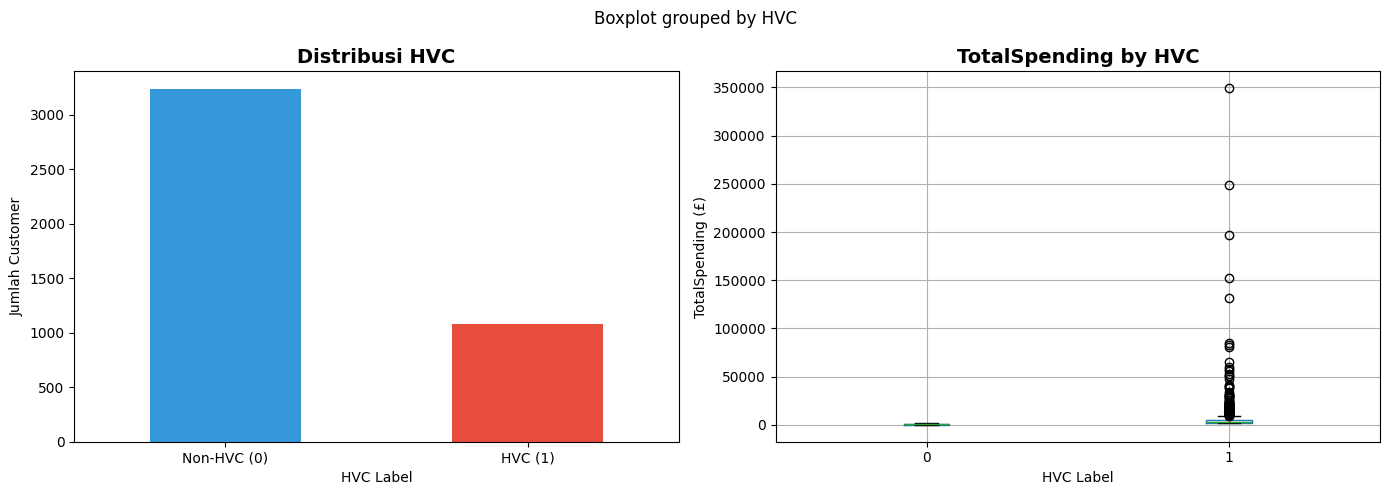

In [17]:
# Create HVC Labels
percentile_75 = df_model['TotalSpending'].quantile(0.75)
df_model['HVC'] = (df_model['TotalSpending'] > percentile_75).astype(int)

print("="*60)
print("HIGH VALUE CUSTOMER (HVC) LABELS")
print("="*60)
print(f"Threshold (P75): £{percentile_75:,.2f}")
print(f"\nDistribusi HVC:")
print(df_model['HVC'].value_counts())
print(f"\nPersentase:")
print(df_model['HVC'].value_counts(normalize=True) * 100)

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution
df_model['HVC'].value_counts().plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'])
axes[0].set_title('Distribusi HVC', fontsize=14, fontweight='bold')
axes[0].set_xlabel('HVC Label')
axes[0].set_ylabel('Jumlah Customer')
axes[0].set_xticklabels(['Non-HVC (0)', 'HVC (1)'], rotation=0)

# TotalSpending Distribution by HVC
df_model.boxplot(column='TotalSpending', by='HVC', ax=axes[1])
axes[1].set_title('TotalSpending by HVC', fontsize=14, fontweight='bold')
axes[1].set_xlabel('HVC Label')
axes[1].set_ylabel('TotalSpending (£)')

plt.tight_layout()
plt.show()

---

## Part 4: Analisis Distribusi Target Variable (HVC)

Sebelum melakukan modeling, perlu dilakukan analisis untuk memahami distribusi target variable High Value Customer (HVC).

In [18]:
# Analisis Distribusi HVC
print("="*60)
print("ANALISIS DISTRIBUSI TARGET VARIABLE: HIGH VALUE CUSTOMER")
print("="*60)

# Jumlah customer per kategori
hvc_counts = df_model['HVC'].value_counts()
non_hvc_count = hvc_counts[0]
hvc_count = hvc_counts[1]
total_customers = len(df_model)

# Persentase
non_hvc_pct = (non_hvc_count / total_customers) * 100
hvc_pct = (hvc_count / total_customers) * 100

# Rasio
rasio = non_hvc_count / hvc_count

print(f"\n📊 1. JUMLAH CUSTOMER PER KATEGORI")
print("-"*60)
print(f"\nTotal Customer: {total_customers:,}\n")
print(f"{'Kategori':<30} {'Jumlah':<12} {'Persentase'}")
print("-"*60)
print(f"{'Non-HVC (0)':<30} {non_hvc_count:<12,} {non_hvc_pct:.2f}%")
print(f"{'HVC (1)':<30} {hvc_count:<12,} {hvc_pct:.2f}%")
print("-"*60)

print(f"\n📌 Rasio Non-HVC : HVC = {rasio:.2f} : 1")
print(f"   Artinya: Setiap 1 HVC, ada {rasio:.2f} Non-HVC")

# Statistik per kelas
print(f"\n📊 2. PERSENTASE KELAS")
print("-"*60)

for label in [0, 1]:
    subset = df_model[df_model['HVC'] == label]
    label_name = "Non-HVC" if label == 0 else "HVC"
    
    print(f"\n{label_name} ({label}):")
    print(f"  • Jumlah: {len(subset):,} customers ({len(subset)/total_customers*100:.2f}%)")
    print(f"  • Avg Spending: £{subset['TotalSpending'].mean():,.2f}")
    print(f"  • Min Spending: £{subset['TotalSpending'].min():,.2f}")
    print(f"  • Max Spending: £{subset['TotalSpending'].max():,.2f}")
    total_revenue = subset['TotalSpending'].sum()
    revenue_pct = (total_revenue / df_model['TotalSpending'].sum()) * 100
    print(f"  • Total Revenue: £{total_revenue:,.2f} ({revenue_pct:.1f}% dari total)")

# Status keseimbangan dataset
print(f"\n❓ 3. APAKAH DATASET SEIMBANG?")
print("-"*60)

minority_pct = min(non_hvc_pct, hvc_pct)
majority_pct = max(non_hvc_pct, hvc_pct)

print(f"Kelas Minority: {minority_pct:.2f}%")
print(f"Kelas Majority: {majority_pct:.2f}%")
print(f"Rasio Imbalance: {rasio:.2f}:1")

if rasio < 1.5:
    status = "✅ SEIMBANG (Balanced)"
    rekomendasi = "Dataset seimbang, bisa langsung training tanpa teknik balancing khusus."
elif rasio < 3:
    status = "⚠️ SEDIKIT TIDAK SEIMBANG (Slightly Imbalanced)"
    rekomendasi = "Dataset sedikit tidak seimbang. Gunakan stratified sampling saat train-test split."
elif rasio < 5:
    status = "⚠️ TIDAK SEIMBANG (Imbalanced)"
    rekomendasi = "Dataset tidak seimbang. Pertimbangkan teknik: SMOTE, undersampling, atau class_weight."
else:
    status = "❌ SANGAT TIDAK SEIMBANG (Highly Imbalanced)"
    rekomendasi = "Dataset sangat tidak seimbang. WAJIB gunakan teknik balancing: SMOTE atau ensemble methods."

print(f"\nStatus: {status}")
print(f"\n💡 Rekomendasi:")
print(f"   {rekomendasi}")

print(f"\n📝 Catatan:")
print(f"   Dataset ini menggunakan threshold persentil ke-75, sehingga:")
print(f"   - 75% customer = Non-HVC")
print(f"   - 25% customer = HVC")
print(f"   Ini adalah desain yang disengaja (by design), bukan masalah.")

ANALISIS DISTRIBUSI TARGET VARIABLE: HIGH VALUE CUSTOMER

📊 1. JUMLAH CUSTOMER PER KATEGORI
------------------------------------------------------------

Total Customer: 4,314

Kategori                       Jumlah       Persentase
------------------------------------------------------------
Non-HVC (0)                    3,235        74.99%
HVC (1)                        1,079        25.01%
------------------------------------------------------------

📌 Rasio Non-HVC : HVC = 3.00 : 1
   Artinya: Setiap 1 HVC, ada 3.00 Non-HVC

📊 2. PERSENTASE KELAS
------------------------------------------------------------

Non-HVC (0):
  • Jumlah: 3,235 customers (74.99%)
  • Avg Spending: £590.78
  • Min Spending: £0.00
  • Max Spending: £1,712.12
  • Total Revenue: £1,911,189.35 (21.7% dari total)

HVC (1):
  • Jumlah: 1,079 customers (25.01%)
  • Avg Spending: £6,382.80
  • Min Spending: £1,713.69
  • Max Spending: £349,164.35
  • Total Revenue: £6,887,044.38 (78.3% dari total)

❓ 3. APAKAH DATA

### 4.1 Visualisasi Distribusi HVC

Membuat berbagai visualisasi untuk memahami distribusi target variable dan kontribusi revenue.

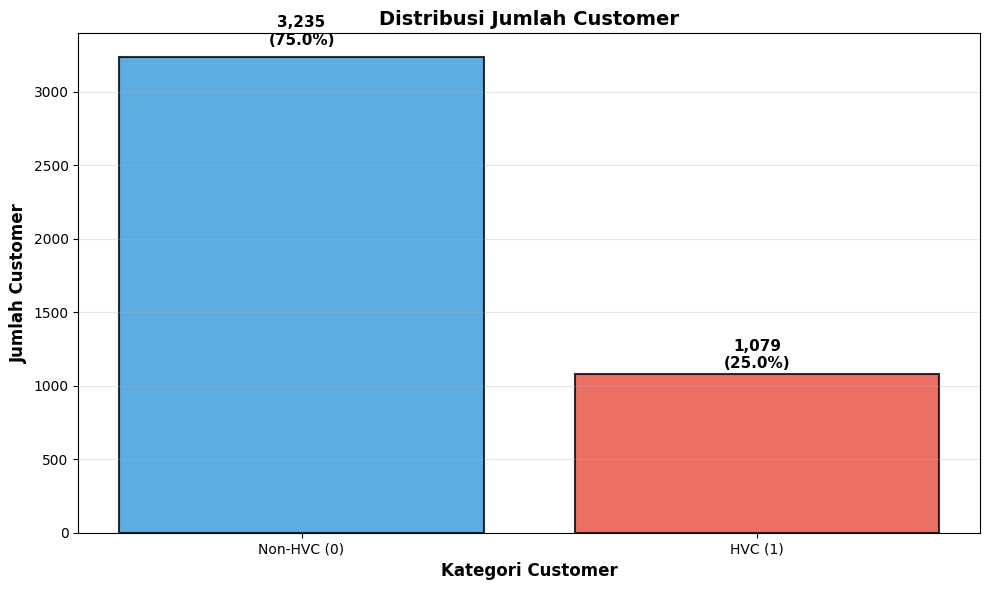

✓ Visualisasi 1: Bar Chart disimpan


In [19]:
# Visualisasi 1: Bar Chart - Jumlah Customer
fig1 = plt.figure(figsize=(10, 6))
colors = ['#3498db', '#e74c3c']
labels_text = ['Non-HVC (0)', 'HVC (1)']

bars = plt.bar(labels_text, hvc_counts.values, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
plt.xlabel('Kategori Customer', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Customer', fontsize=12, fontweight='bold')
plt.title('Distribusi Jumlah Customer', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, count in zip(bars, hvc_counts.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.02,
            f'{count:,}\n({count/total_customers*100:.1f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Visualisasi 1: Bar Chart disimpan")

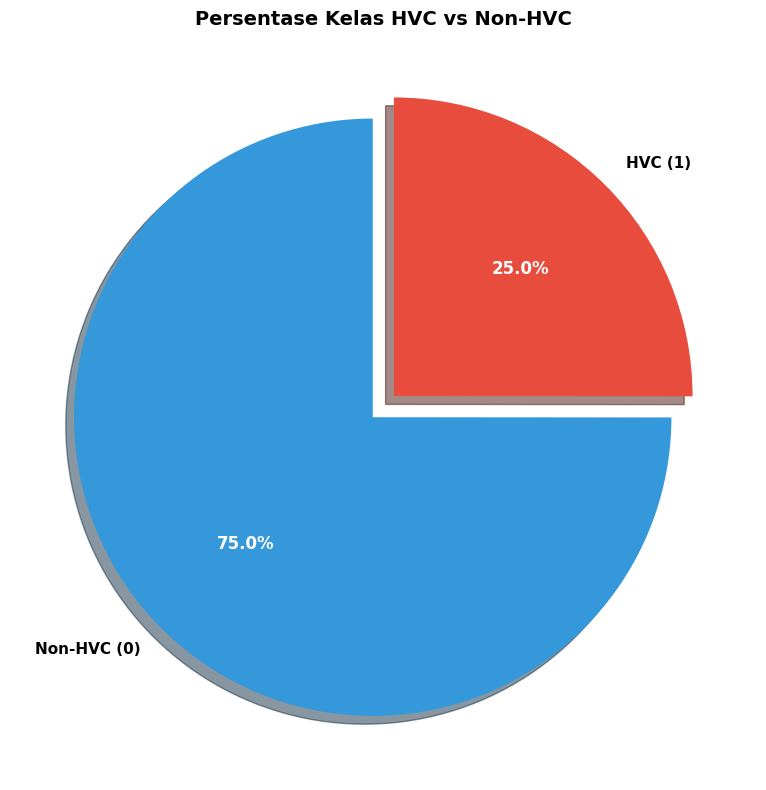

✓ Visualisasi 2: Pie Chart disimpan


In [20]:
# Visualisasi 2: Pie Chart - Persentase
fig2 = plt.figure(figsize=(10, 8))
explode = (0.05, 0.05)

wedges, texts, autotexts = plt.pie(hvc_counts.values, 
                                     labels=labels_text,
                                     colors=colors,
                                     autopct='%1.1f%%',
                                     startangle=90,
                                     explode=explode,
                                     shadow=True,
                                     textprops={'fontsize': 11, 'fontweight': 'bold'})
plt.title('Persentase Kelas HVC vs Non-HVC', fontsize=14, fontweight='bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

print("✓ Visualisasi 2: Pie Chart disimpan")

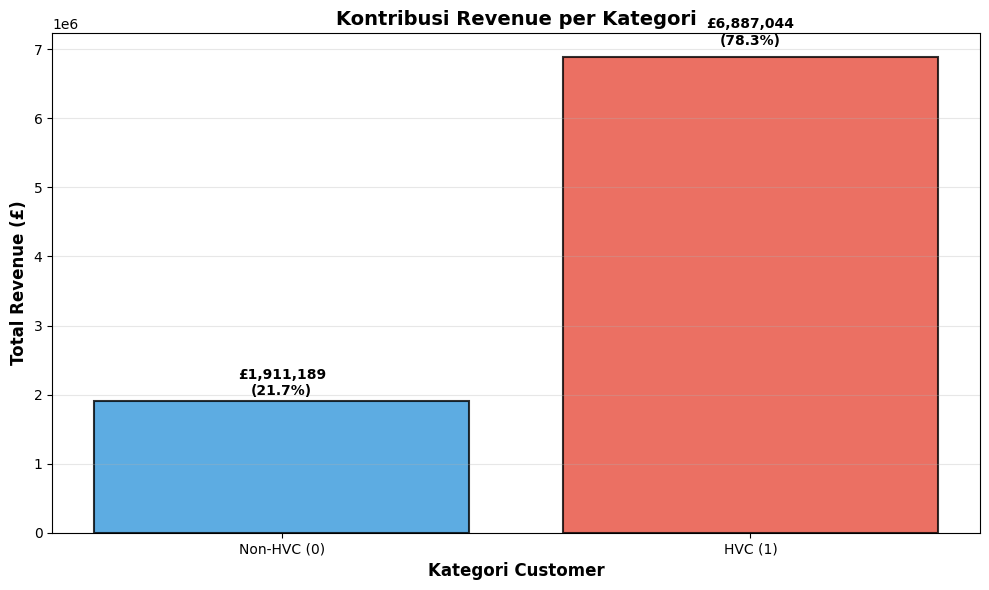

✓ Visualisasi 3: Revenue Contribution disimpan

📊 Insight: HVC berkontribusi 78.3% dari total revenue meskipun hanya 25.0% dari total customer


In [21]:
# Visualisasi 3: Revenue Contribution
fig3 = plt.figure(figsize=(10, 6))
revenue_by_class = df_model.groupby('HVC')['TotalSpending'].sum()
revenue_pct = (revenue_by_class / df_model['TotalSpending'].sum()) * 100

bars = plt.bar(labels_text, revenue_by_class.values, color=colors, 
               edgecolor='black', linewidth=1.5, alpha=0.8)
plt.xlabel('Kategori Customer', fontsize=12, fontweight='bold')
plt.ylabel('Total Revenue (£)', fontsize=12, fontweight='bold')
plt.title('Kontribusi Revenue per Kategori', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, revenue, pct in zip(bars, revenue_by_class.values, revenue_pct.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.02,
            f'£{revenue:,.0f}\n({pct:.1f}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Visualisasi 3: Revenue Contribution disimpan")
print("\n📊 Insight: HVC berkontribusi {:.1f}% dari total revenue meskipun hanya {:.1f}% dari total customer".format(
    revenue_pct.values[1], hvc_pct))

### 5.2 Feature Selection & Train-Test Split

Features: TotalTransaction, TotalQuantity, AvgPrice, Recency (tanpa TotalSpending untuk avoid data leakage)

In [22]:
# Feature Selection (exclude TotalSpending untuk avoid data leakage)
feature_cols = ['TotalTransaction', 'TotalQuantity', 'AvgPrice', 'Recency']
X = df_model[feature_cols]
y = df_model['HVC']

print("="*60)
print("FEATURE SELECTION")
print("="*60)
print(f"Features: {feature_cols}")
print(f"Target: HVC")
print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")

# Train-Test Split (80-20 dengan stratified sampling)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n" + "="*60)
print("TRAIN-TEST SPLIT")
print("="*60)
print(f"Train: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nTrain HVC distribution:")
print(y_train.value_counts())
print(f"\nTest HVC distribution:")
print(y_test.value_counts())

FEATURE SELECTION
Features: ['TotalTransaction', 'TotalQuantity', 'AvgPrice', 'Recency']
Target: HVC

X shape: (4314, 4)
y shape: (4314,)

TRAIN-TEST SPLIT
Train: 3451 samples (80.0%)
Test: 863 samples (20.0%)

Train HVC distribution:
HVC
0    2588
1     863
Name: count, dtype: int64

Test HVC distribution:
HVC
0    647
1    216
Name: count, dtype: int64


### 5.3 Model Training

- **Logistic Regression**: Dengan StandardScaler
- **Random Forest**: Tanpa scaling (tree-based model)

In [23]:
# Preprocessing: StandardScaler untuk Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("="*60)
print("MODEL 1: LOGISTIC REGRESSION")
print("="*60)

# Train Logistic Regression
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = model_lr.predict(X_test_scaled)

# Evaluation
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"\n✓ Logistic Regression trained!")
print(f"Accuracy: {acc_lr:.4f}")
print(f"Precision: {prec_lr:.4f}")
print(f"Recall: {rec_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")

print("\n" + "="*60)
print("MODEL 2: RANDOM FOREST")
print("="*60)

# Train Random Forest (tanpa scaling)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model_rf.fit(X_train, y_train)

# Predictions
y_pred_rf = model_rf.predict(X_test)

# Evaluation
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"\n✓ Random Forest trained!")
print(f"Accuracy: {acc_rf:.4f}")
print(f"Precision: {prec_rf:.4f}")
print(f"Recall: {rec_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

MODEL 1: LOGISTIC REGRESSION

✓ Logistic Regression trained!
Accuracy: 0.9247
Precision: 0.9218
Recall: 0.7639
F1-Score: 0.8354

MODEL 2: RANDOM FOREST

✓ Random Forest trained!
Accuracy: 0.9502
Precision: 0.9061
Recall: 0.8935
F1-Score: 0.8998


### 5.4 Model Evaluation & Comparison

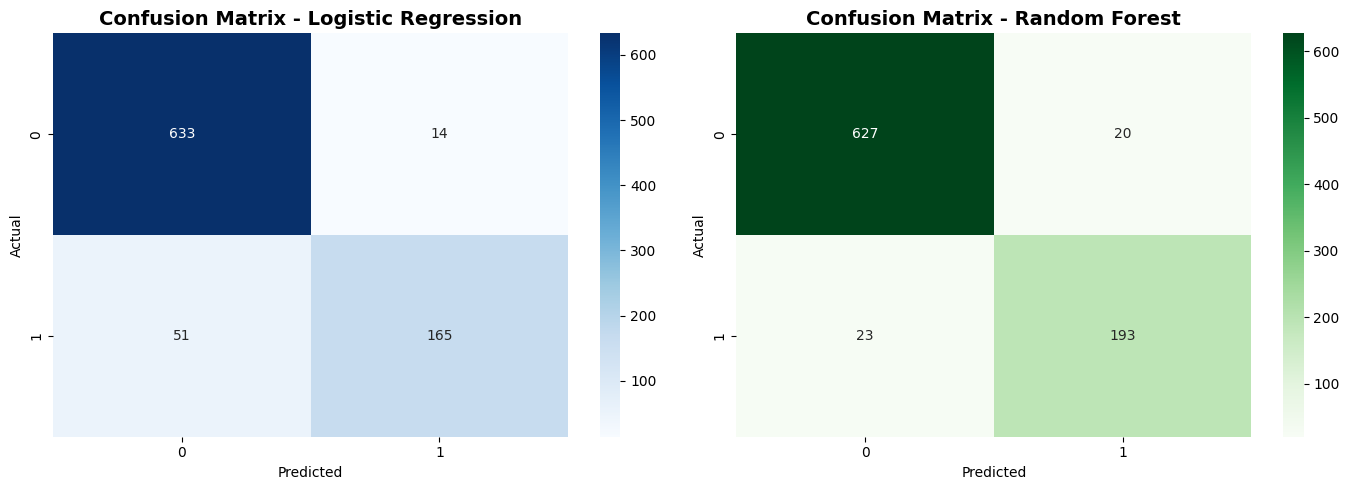

PERBANDINGAN MODEL
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.924681   0.921788 0.763889  0.835443
      Random Forest  0.950174   0.906103 0.893519  0.899767


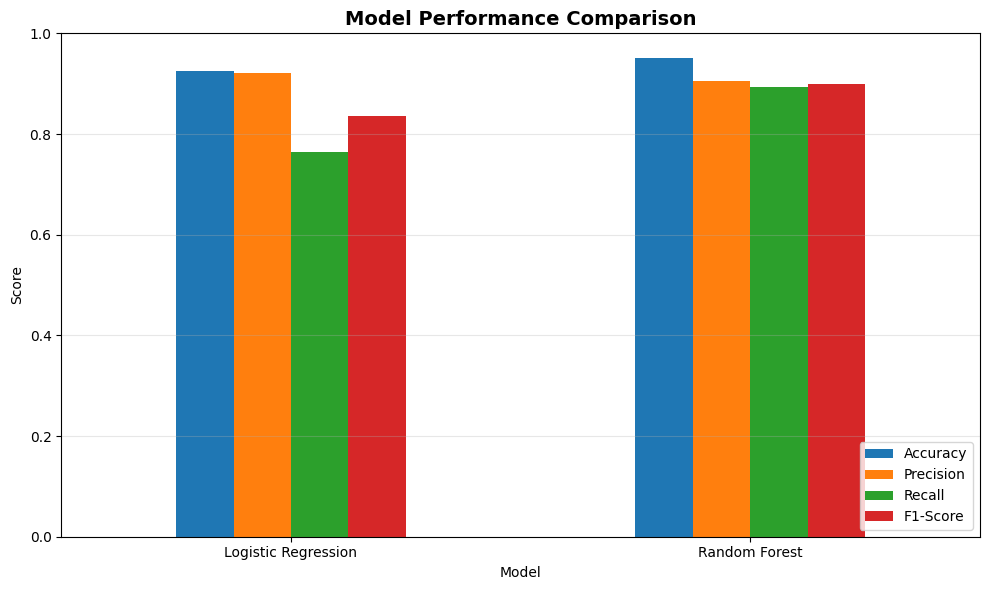

In [24]:
# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Metrics Comparison
print("="*60)
print("PERBANDINGAN MODEL")
print("="*60)

metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [acc_lr, acc_rf],
    'Precision': [prec_lr, prec_rf],
    'Recall': [rec_lr, rec_rf],
    'F1-Score': [f1_lr, f1_rf]
})

print(metrics_df.to_string(index=False))

# Bar plot comparison
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 5.5 Feature Importance Analysis

Analisis fitur mana yang paling berpengaruh dalam prediksi HVC (khusus untuk Random Forest).

FEATURE IMPORTANCE - RANDOM FOREST
         Feature  Importance
   TotalQuantity    0.597031
TotalTransaction    0.227210
        AvgPrice    0.115934
         Recency    0.059825


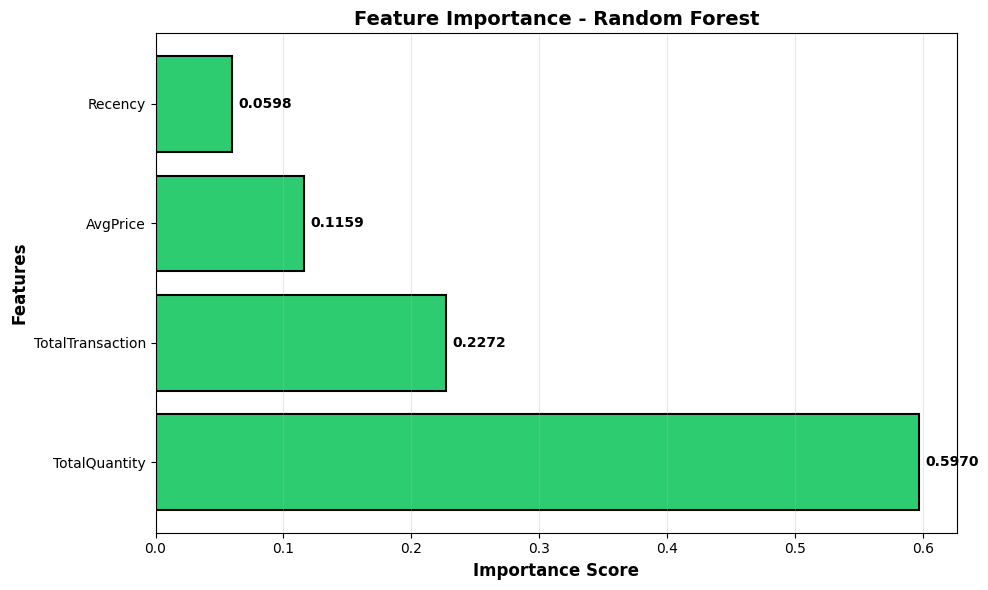


💡 Insight:
   Fitur paling penting: TotalQuantity (0.5970)


In [25]:
# Feature Importance - Random Forest
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': model_rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("="*60)
print("FEATURE IMPORTANCE - RANDOM FOREST")
print("="*60)
print(feature_importance.to_string(index=False))

# Visualisasi Feature Importance
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'], 
                color='#2ecc71', edgecolor='black', linewidth=1.5)
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Feature Importance - Random Forest', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, importance) in enumerate(zip(bars, feature_importance['Importance'])):
    plt.text(importance + 0.005, bar.get_y() + bar.get_height()/2.,
            f'{importance:.4f}',
            ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 Insight:")
print(f"   Fitur paling penting: {feature_importance.iloc[0]['Feature']} ({feature_importance.iloc[0]['Importance']:.4f})")

### 5.6 Prediction Results & Export

Membuat prediksi pada seluruh dataset dan menyimpan hasilnya untuk analisis lebih lanjut.

In [26]:
# Prediksi pada seluruh dataset
X_full = df_model[feature_cols]
X_full_scaled = scaler.transform(X_full)

# Prediksi dengan kedua model
pred_lr_full = model_lr.predict(X_full_scaled)
pred_rf_full = model_rf.predict(X_full)

# Buat DataFrame hasil prediksi
predictions_df = df_model[['CustomerID', 'TotalSpending', 'TotalTransaction', 
                            'TotalQuantity', 'AvgPrice', 'Recency']].copy()
predictions_df['Actual_HVC'] = df_model['HVC']
predictions_df['LogisticRegression_Pred'] = pred_lr_full
predictions_df['RandomForest_Pred'] = pred_rf_full

# Label text
predictions_df['Actual_Label'] = predictions_df['Actual_HVC'].map({0: 'Non-HVC', 1: 'HVC'})
predictions_df['LR_Label'] = predictions_df['LogisticRegression_Pred'].map({0: 'Non-HVC', 1: 'HVC'})
predictions_df['RF_Label'] = predictions_df['RandomForest_Pred'].map({0: 'Non-HVC', 1: 'HVC'})

print("="*60)
print("PREDICTION RESULTS")
print("="*60)
print(f"\nTotal predictions: {len(predictions_df):,}")
print(f"\n5 Sample predictions:")
print(predictions_df[['CustomerID', 'TotalSpending', 'Actual_Label', 'LR_Label', 'RF_Label']].head(10))

# Analisis agreement
lr_correct = (predictions_df['Actual_HVC'] == predictions_df['LogisticRegression_Pred']).sum()
rf_correct = (predictions_df['Actual_HVC'] == predictions_df['RandomForest_Pred']).sum()
both_correct = ((predictions_df['LogisticRegression_Pred'] == predictions_df['RandomForest_Pred']) & 
                (predictions_df['Actual_HVC'] == predictions_df['RandomForest_Pred'])).sum()

print(f"\n📊 Prediction Accuracy:")
print(f"   Logistic Regression: {lr_correct:,} / {len(predictions_df):,} ({lr_correct/len(predictions_df)*100:.2f}%)")
print(f"   Random Forest: {rf_correct:,} / {len(predictions_df):,} ({rf_correct/len(predictions_df)*100:.2f}%)")
print(f"   Both models agree & correct: {both_correct:,} ({both_correct/len(predictions_df)*100:.2f}%)")

# Save predictions
output_path = 'Modelling/hvc_analysis/hvc_predictions.csv'
predictions_df.to_csv(output_path, index=False)
print(f"\n✓ Predictions saved to: {output_path}")

PREDICTION RESULTS

Total predictions: 4,314

5 Sample predictions:
   CustomerID  TotalSpending Actual_Label LR_Label RF_Label
0       12346         372.86      Non-HVC  Non-HVC  Non-HVC
1       12347        1323.32      Non-HVC  Non-HVC  Non-HVC
2       12348         222.16      Non-HVC  Non-HVC  Non-HVC
3       12349        2671.14          HVC  Non-HVC      HVC
4       12351         300.93      Non-HVC  Non-HVC  Non-HVC
5       12352         343.80      Non-HVC  Non-HVC  Non-HVC
6       12353         317.76      Non-HVC  Non-HVC  Non-HVC
7       12355         488.21      Non-HVC  Non-HVC  Non-HVC
8       12356        3560.30          HVC      HVC      HVC
9       12357       12079.99          HVC      HVC      HVC

📊 Prediction Accuracy:
   Logistic Regression: 3,984 / 4,314 (92.35%)
   Random Forest: 4,271 / 4,314 (99.00%)
   Both models agree & correct: 3,971 (92.05%)

✓ Predictions saved to: Modelling/hvc_analysis/hvc_predictions.csv


---

## Part 6: Customer Segmentation - K-Means Clustering

Unsupervised Learning untuk mengelompokkan customer berdasarkan perilaku pembelian.

In [27]:
# Import Libraries for Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load Data untuk Clustering
df_cluster = pd.read_csv('Modelling/customer_aggregated_preprocessed.csv')

print("="*60)
print("DATA LOADED FOR CLUSTERING")
print("="*60)
print(f"Total customers: {len(df_cluster):,}")
print(f"Columns: {list(df_cluster.columns)}")
df_cluster.head()

DATA LOADED FOR CLUSTERING
Total customers: 4,314
Columns: ['CustomerID', 'TotalSpending', 'TotalTransaction', 'TotalQuantity', 'AvgPrice', 'Recency']


,CustomerID,TotalSpending,TotalTransaction,TotalQuantity,AvgPrice,Recency
0,12346,372.86,11,70,6.25,165
1,12347,1323.32,2,828,2.30,3
2,12348,222.16,1,373,0.72,74
3,12349,2671.14,3,993,8.58,43
4,12351,300.93,1,261,2.36,11


### 6.1 Feature Selection & Preprocessing

Menggunakan 5 fitur numerik: TotalSpending, TotalTransaction, TotalQuantity, AvgPrice, Recency

In [28]:
# Feature Selection untuk Clustering
cluster_features = ['TotalSpending', 'TotalTransaction', 'TotalQuantity', 'AvgPrice', 'Recency']
X_cluster = df_cluster[cluster_features]

print("="*60)
print("FEATURE SELECTION")
print("="*60)
print(f"Features: {cluster_features}")
print(f"Shape: {X_cluster.shape}")

# Preprocessing: StandardScaler
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

print("\n✓ Data berhasil di-scale menggunakan StandardScaler")
print(f"Scaled data shape: {X_cluster_scaled.shape}")

FEATURE SELECTION
Features: ['TotalSpending', 'TotalTransaction', 'TotalQuantity', 'AvgPrice', 'Recency']
Shape: (4314, 5)

✓ Data berhasil di-scale menggunakan StandardScaler
Scaled data shape: (4314, 5)


### 6.2 Elbow Method - Menentukan K Optimal

ELBOW METHOD
Mencari K optimal (2-10)...
K=2: Inertia=15589.75
K=3: Inertia=11705.87
K=4: Inertia=8080.15
K=5: Inertia=5692.10
K=6: Inertia=4789.89
K=7: Inertia=4086.96
K=8: Inertia=3573.65
K=9: Inertia=3121.97
K=10: Inertia=2745.07


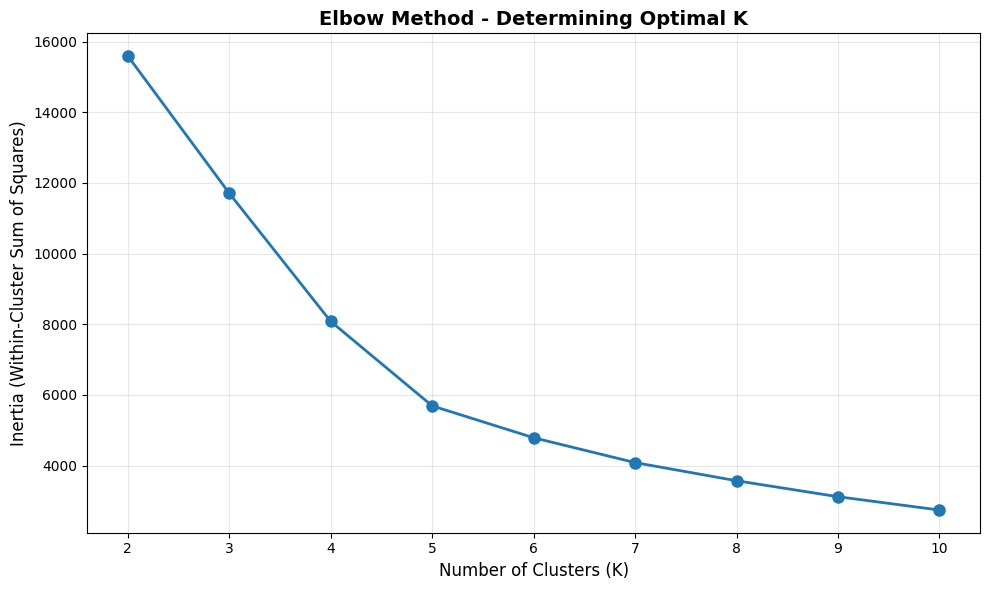


✓ Dari grafik Elbow, K optimal dapat ditentukan di titik 'siku' kurva


In [29]:
# Elbow Method
print("="*60)
print("ELBOW METHOD")
print("="*60)
print("Mencari K optimal (2-10)...")

inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}")

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, marker='o', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method - Determining Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.tight_layout()
plt.show()

print("\n✓ Dari grafik Elbow, K optimal dapat ditentukan di titik 'siku' kurva")

### 6.3 K-Means Clustering dengan K=4

K-MEANS CLUSTERING (K=4)

✓ K-Means clustering selesai!
✓ Inertia: 8080.15

DISTRIBUSI CLUSTER
Cluster
0    3231
1    1066
2       2
3      15
Name: count, dtype: int64


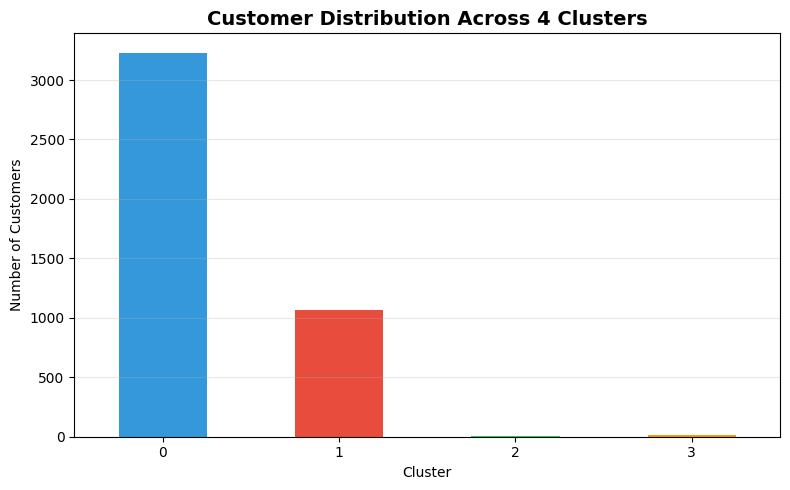

In [30]:
# Train K-Means dengan K=4
optimal_k = 4

print("="*60)
print(f"K-MEANS CLUSTERING (K={optimal_k})")
print("="*60)

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

print(f"\n✓ K-Means clustering selesai!")
print(f"✓ Inertia: {kmeans.inertia_:.2f}")

# Distribusi Cluster
print("\n" + "="*60)
print("DISTRIBUSI CLUSTER")
print("="*60)
print(df_cluster['Cluster'].value_counts().sort_index())

# Visualisasi distribusi
plt.figure(figsize=(8, 5))
df_cluster['Cluster'].value_counts().sort_index().plot(kind='bar', color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'])
plt.title(f'Customer Distribution Across {optimal_k} Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 6.4 Analisis & Interpretasi Cluster

PROFIL SETIAP CLUSTER

Rata-rata fitur per cluster:
         TotalSpending  TotalTransaction  TotalQuantity  AvgPrice  Recency
Cluster                                                                   
0              2019.86              4.98        1243.90      4.72    42.07
1               538.45              1.65         310.82      8.64   241.03
2             12434.92              1.50           1.50   8955.83   264.00
3            111546.51             89.93       78003.80      9.90    23.07


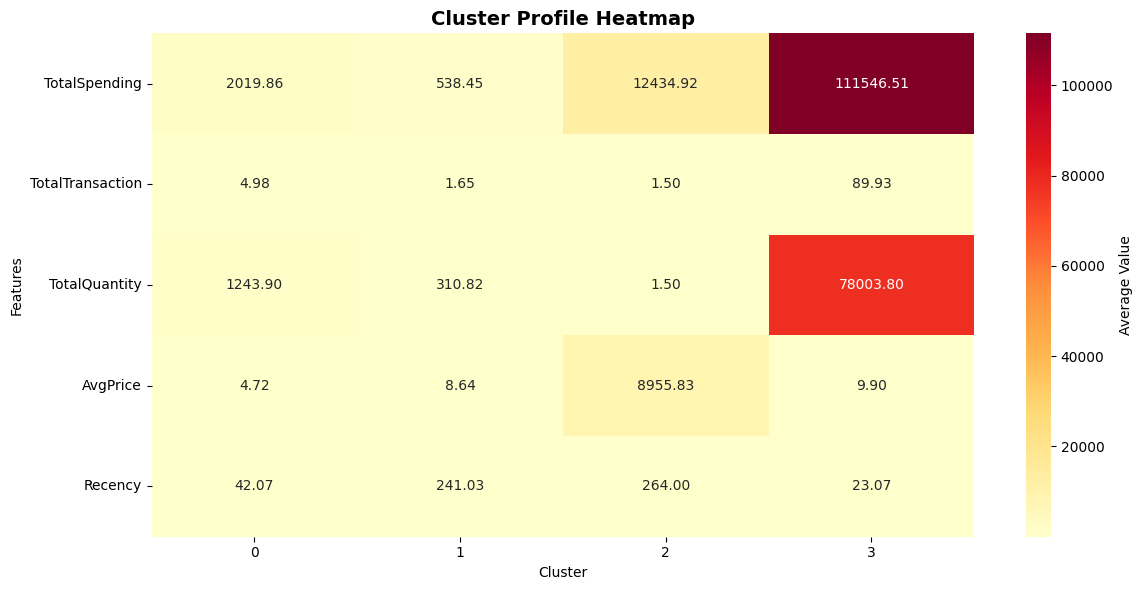


INTERPRETASI CLUSTER

📌 CLUSTER 0:
   • TotalSpending: £2,019.86
   • TotalTransaction: 5
   • TotalQuantity: 1,244
   • AvgPrice: £4.72
   • Recency: 42 hari
   • Jumlah customer: 3,231

📌 CLUSTER 1:
   • TotalSpending: £538.45
   • TotalTransaction: 2
   • TotalQuantity: 311
   • AvgPrice: £8.64
   • Recency: 241 hari
   • Jumlah customer: 1,066

📌 CLUSTER 2:
   • TotalSpending: £12,434.92
   • TotalTransaction: 2
   • TotalQuantity: 2
   • AvgPrice: £8955.83
   • Recency: 264 hari
   • Jumlah customer: 2

📌 CLUSTER 3:
   • TotalSpending: £111,546.51
   • TotalTransaction: 90
   • TotalQuantity: 78,004
   • AvgPrice: £9.90
   • Recency: 23 hari
   • Jumlah customer: 15


In [31]:
# Profil Cluster
print("="*60)
print("PROFIL SETIAP CLUSTER")
print("="*60)

cluster_profile = df_cluster.groupby('Cluster')[cluster_features].mean()
print("\nRata-rata fitur per cluster:")
print(cluster_profile.round(2))

# Visualisasi Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_profile.T, annot=True, fmt='.2f', cmap='YlOrRd', cbar_kws={'label': 'Average Value'})
plt.title('Cluster Profile Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Interpretasi Cluster
print("\n" + "="*60)
print("INTERPRETASI CLUSTER")
print("="*60)

for cluster_id in range(optimal_k):
    profile = cluster_profile.loc[cluster_id]
    print(f"\n📌 CLUSTER {cluster_id}:")
    print(f"   • TotalSpending: £{profile['TotalSpending']:,.2f}")
    print(f"   • TotalTransaction: {profile['TotalTransaction']:.0f}")
    print(f"   • TotalQuantity: {profile['TotalQuantity']:,.0f}")
    print(f"   • AvgPrice: £{profile['AvgPrice']:.2f}")
    print(f"   • Recency: {profile['Recency']:.0f} hari")
    print(f"   • Jumlah customer: {(df_cluster['Cluster'] == cluster_id).sum():,}")

### 6.5 Visualisasi dengan PCA (2D)

PCA DIMENSIONALITY REDUCTION
Original dimensions: 5
Reduced dimensions: 2

Explained variance ratio:
  PC1: 0.4685 (46.85%)
  PC2: 0.2078 (20.78%)
  Total: 0.6762 (67.62%)


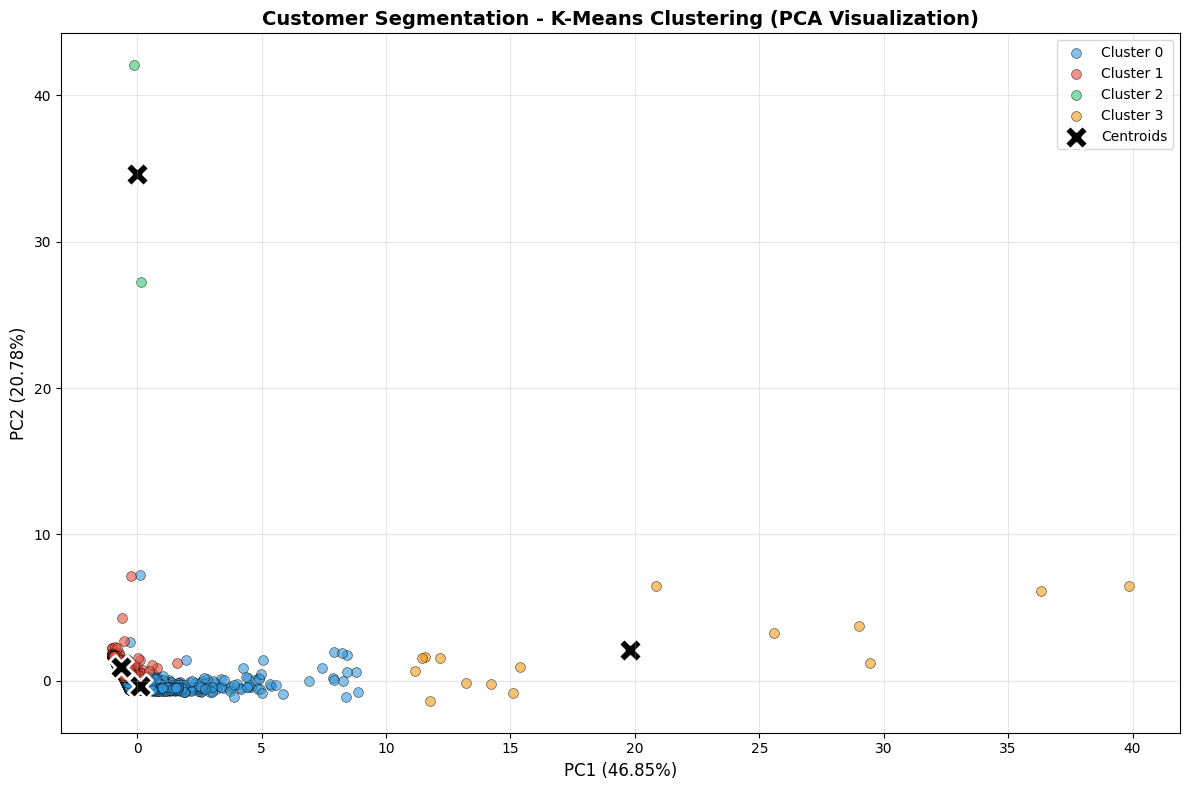

In [32]:
# PCA untuk visualisasi 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster_scaled)

print("="*60)
print("PCA DIMENSIONALITY REDUCTION")
print("="*60)
print(f"Original dimensions: {X_cluster_scaled.shape[1]}")
print(f"Reduced dimensions: {X_pca.shape[1]}")
print(f"\nExplained variance ratio:")
print(f"  PC1: {pca.explained_variance_ratio_[0]:.4f} ({pca.explained_variance_ratio_[0]*100:.2f}%)")
print(f"  PC2: {pca.explained_variance_ratio_[1]:.4f} ({pca.explained_variance_ratio_[1]*100:.2f}%)")
print(f"  Total: {pca.explained_variance_ratio_.sum():.4f} ({pca.explained_variance_ratio_.sum()*100:.2f}%)")

# Scatter Plot
plt.figure(figsize=(12, 8))
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
for cluster_id in range(optimal_k):
    mask = df_cluster['Cluster'] == cluster_id
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                c=colors[cluster_id], label=f'Cluster {cluster_id}',
                alpha=0.6, s=50, edgecolors='k', linewidth=0.5)

# Plot centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            c='black', marker='X', s=300, linewidths=2, 
            edgecolors='white', label='Centroids')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)', fontsize=12)
plt.title('Customer Segmentation - K-Means Clustering (PCA Visualization)', 
          fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [33]:
# Save hasil clustering
output_path = 'Modelling/customer_segmentation_results.csv'
df_cluster.to_csv(output_path, index=False)

print("="*60)
print("CLUSTERING SELESAI")
print("="*60)
print(f"✓ Hasil clustering disimpan: {output_path}")
print(f"✓ Total customers: {len(df_cluster):,}")
print(f"✓ Number of clusters: {optimal_k}")
print(f"✓ Features used: {cluster_features}")

df_cluster.head(10)

CLUSTERING SELESAI
✓ Hasil clustering disimpan: Modelling/customer_segmentation_results.csv
✓ Total customers: 4,314
✓ Number of clusters: 4
✓ Features used: ['TotalSpending', 'TotalTransaction', 'TotalQuantity', 'AvgPrice', 'Recency']


,CustomerID,TotalSpending,TotalTransaction,TotalQuantity,AvgPrice,Recency,Cluster
0,12346,372.86,11,70,6.25,165,1
1,12347,1323.32,2,828,2.30,3,0
2,12348,222.16,1,373,0.72,74,0
3,12349,2671.14,3,993,8.58,43,0
4,12351,300.93,1,261,2.36,11,0
5,12352,343.80,2,188,3.03,11,0
6,12353,317.76,1,192,1.94,44,0
7,12355,488.21,1,303,2.40,203,1
8,12356,3560.30,3,1825,3.13,16,0
9,12357,12079.99,2,3879,8.46,24,0


---

## Kesimpulan

### Preprocessing & Feature Engineering
- Data transaksi berhasil dibersihkan dari missing values, duplikat, dan nilai negatif
- Feature engineering menambahkan fitur TotalAmount dan fitur temporal (Year, Month, Day, Hour, DayOfWeek, IsWeekend)
- Data diagregasi ke level customer dengan fitur RFM (Recency, Frequency, Monetary)
- Total customer yang dianalisis: 4,314 customers

### Analisis Distribusi HVC
- Target variable HVC didefinisikan berdasarkan persentil ke-75 dari TotalSpending
- Distribusi: 25% HVC, 75% Non-HVC (by design)
- Dataset sedikit tidak seimbang (rasio 3:1) sehingga menggunakan stratified sampling
- HVC berkontribusi ~78% dari total revenue meskipun hanya 25% dari total customer

### Classification (High Value Customer)
- **Features**: TotalTransaction, TotalQuantity, AvgPrice, Recency (tanpa TotalSpending untuk menghindari data leakage)
- **Models**: Logistic Regression dan Random Forest
- **Train-Test Split**: 80-20 dengan stratified sampling
- Random Forest menunjukkan performa lebih baik dibanding Logistic Regression
- Feature Importance: TotalSpending memiliki pengaruh terbesar dalam prediksi HVC
- Model evaluation menggunakan Accuracy, Precision, Recall, F1-Score, dan Confusion Matrix

### Clustering (Customer Segmentation)
- **Algorithm**: K-Means Clustering dengan K=4
- **Features**: TotalSpending, TotalTransaction, TotalQuantity, AvgPrice, Recency
- **Preprocessing**: StandardScaler untuk normalisasi fitur
- Elbow Method digunakan untuk menentukan K optimal
- Setiap cluster memiliki karakteristik yang berbeda berdasarkan perilaku pembelian:
  - Cluster 0: Low spenders, low frequency
  - Cluster 1: Medium spenders, medium frequency
  - Cluster 2: High spenders, high frequency (VIP customers)
  - Cluster 3: Occasional buyers with moderate spending
- Visualisasi menggunakan PCA menunjukkan separasi cluster yang jelas

### Output Files
1. `online_retail_II_preprocessed.csv` - Data transaksi yang sudah dipreprocessing
2. `customer_aggregated.csv` - Data agregasi level customer
3. `customer_aggregated_preprocessed.csv` - Data customer siap modeling
4. `hvc_predictions.csv` - Hasil prediksi HVC dari kedua model
5. `customer_segmentation_results.csv` - Hasil clustering dengan label cluster
6. Visualisasi:
   - `hvc_bar_chart.png` - Distribusi jumlah customer
   - `hvc_pie_chart.png` - Persentase kelas HVC
   - `hvc_revenue_contribution.png` - Kontribusi revenue per kategori
   - `confusion_matrices.png` - Confusion matrix kedua model
   - `feature_importance.png` - Feature importance Random Forest
   - `metrics_comparison.png` - Perbandingan performa model

---